In [1]:
#pip install datasets
#pip install numpy
#pip install pandas
#pip install seaborn
#pip install scikit-learn
#pip install openpyxl
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from datasets import load_dataset

In [2]:
dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

In [3]:
df_test = pd.DataFrame(dataset['test'])
df_train = pd.DataFrame(dataset['train'])

In [4]:
df_test

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive
...,...,...,...,...
5201,10277,Fuck no internet damn time warner!,0,negative
5202,8610,Looking forward to android 1.5 being pushed t...,1,neutral
5203,8114,Not good. Wasted time.,0,negative
5204,3034,"U were great, as always. But, can`t we do an ...",2,positive


In [5]:
df_train

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
31227,6265,Grrrr....I got the wrong size coat for the sheep,0,negative
31228,11284,4 cases of swine flu!,1,neutral
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral


<Axes: >

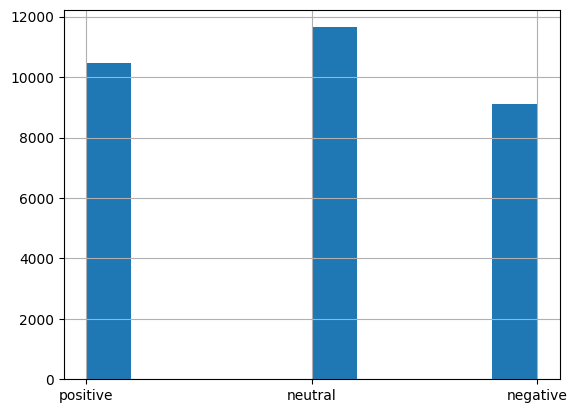

In [6]:
df_train['sentiment'].hist()

<Axes: >

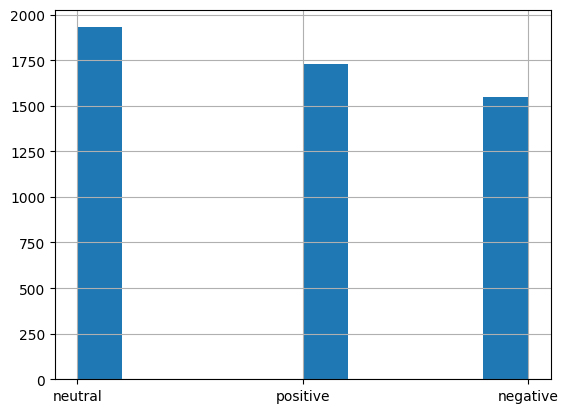

In [7]:
df_test['sentiment'].hist()

In [8]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<31232x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 401264 stored elements in Compressed Sparse Row format>

In [9]:
empty_docs = df_test['text'].isnull() | (df_test['text'] == '')
print(empty_docs.sum())
#eliminar elemnto empy
df_test = df_test[~empty_docs]

1


In [10]:
X_test = vectorizer.transform(df_test['text'])
X_test

<5205x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 66219 stored elements in Compressed Sparse Row format>

In [11]:
Y_train = df_train['label']
Y_test = df_test['label']

In [12]:
#entranar modelo con regresion logistica
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.7207351434426229
Test acc: 0.6751200768491835


In [13]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [14]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.66556837, 0.2800659 , 0.05436573],
       [0.14241566, 0.73371105, 0.12387329],
       [0.04609658, 0.19965642, 0.75424699]])

In [15]:
def plot_cm(cm):
    classes = ['negative', 'positive', 'neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("label")

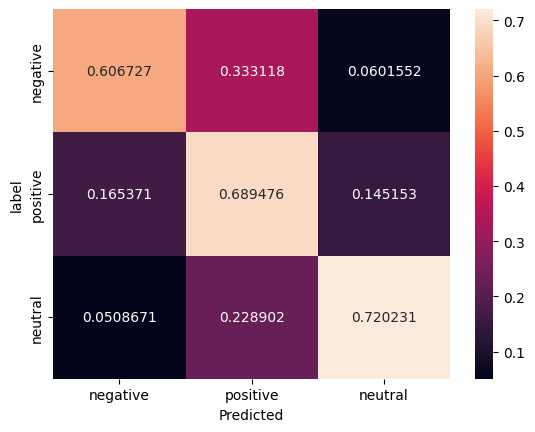

In [16]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [17]:
#unir tablas para beta 2
df = pd.concat([df_train, df_test], ignore_index=True)

In [18]:
df

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
36432,10277,Fuck no internet damn time warner!,0,negative
36433,8610,Looking forward to android 1.5 being pushed t...,1,neutral
36434,8114,Not good. Wasted time.,0,negative
36435,3034,"U were great, as always. But, can`t we do an ...",2,positive


In [19]:
df_train, df_test = train_test_split(df)

In [20]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<27327x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 350190 stored elements in Compressed Sparse Row format>

In [21]:
X_test = vectorizer.transform(df_test['text'])
X_test

<9110x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 117172 stored elements in Compressed Sparse Row format>

In [22]:
Y_train = df_train['label']
Y_test = df_test['label']